# SLP Test

Explorando 30 rodadas com classificador **Perceptron** no conjunto de dados da iris e coletando média dos resultados

## Importando bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, recall_score

## Sumário

1. [Carregando dados](#Carregando-dataset-e-gerando-DataFrame);

2. [Plotando _Pairplot_](#Plotando-pairplot);

3. [30 rodadas](#-Realizando-30-rodadas);

4. [Métricas](#Gerando-DataFrame-de-Sensibilidade-e-Acurácia);

## Declarando função responsável por 30 rodadas com Perceptron

In [3]:
def test_30_perceptron(x, y, y_labels):
    '''
    Executa 30 rodadas com Perceptron, imprimindo o resultado da classificação e plotando a matriz de confusão.

    Ao final, retorna 3 listas, contendo a acurácia, a sensibilidade e a matriz de confusão (não normalizada) ao longo das 30 rodadas, respectivamente.
    '''
    # Armazena os resultados de acurácia, sensibilidade e matriz de confusão que ao final serão retornados
    irisAcc = []
    irisRec = []
    matrixProdada = []

    # Armazena as sementes já usadas para não haver repetição
    usedSeed = []

    for i in range(30):

        # Gerando inteiro aleatório para distribuição dos dados
        semente = randint(0, 8001)
        
        while semente in usedSeed:
            semente = randint(0, 8001)
        
        usedSeed.append(semente)

        # Separando dados para treino e teste
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=semente)

        # Instanciando Scaler
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)

        # Instanciando classificador
        classifier = Perceptron()

        # Treinando modelo
        classifier.fit(X_train_std, y_train)

        # Realizando teste de classificação
        y_pred = classifier.predict(X_test_std)

        # Adicionando resultados à lista
        acc = accuracy_score(y_test, y_pred)
        irisAcc.append(acc)

        rec = recall_score(y_test, y_pred, average=None)
        irisRec.append(rec)

        matrixProdada.append(confusion_matrix(y_test, y_pred, normalize=None))

        # Exibindo resultados da rodada
        print(f"\n- RODADA {i} - Semente {semente} -\n")
        print("- Acurácia {accuracy} -\n- Sensibilidade {recall} -\n".format(accuracy=acc, recall=rec))

        print(classification_report(y_test, y_pred, target_names=y_labels))

        print("Matriz de confusão normalizada")
        plot_confusion_matrix(
            estimator=classifier,
            X=X_test_std,
            y_true=y_test,
            display_labels=y_labels,
            cmap=plt.cm.Blues,
            normalize='true'
        )
        plt.show()
    return irisAcc, irisRec, matrixProdada

## Carregando _dataset_ e gerando _DataFrame_

In [4]:
# Carregando dataset
irisDS = load_iris()

features, targets = irisDS.data, irisDS.target

# Gerando dataframe
irisDF = pd.DataFrame(data=features, columns=irisDS.feature_names)
irisDF['target names'] = pd.Categorical.from_codes(irisDS.target, irisDS.target_names)

irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plotando _pairplot_

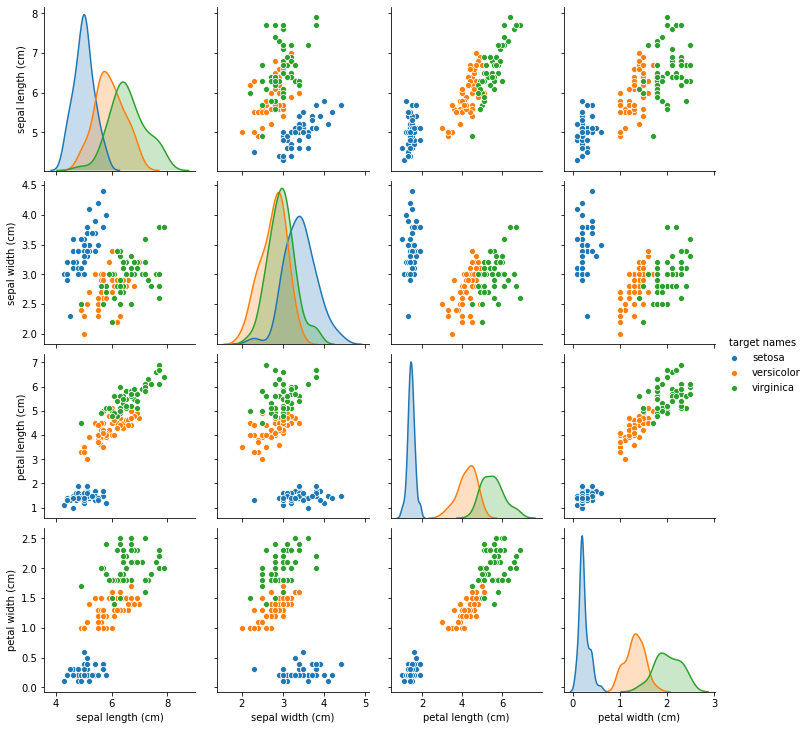

In [5]:
sns.pairplot(
    data=irisDF,
    x_vars=irisDF.columns[:4],
    y_vars=irisDF.columns[:4],
    hue='target names'
)

## Realizando 30 rodadas


- RODADA 0 - Semente 4495 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.82352941 1.        ] -

              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        16
  versicolor       1.00      0.82      0.90        17
   virginica       0.86      1.00      0.92        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45

Matriz de confusão normalizada


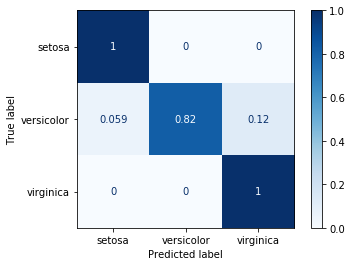


- RODADA 1 - Semente 1336 -

- Acurácia 0.8888888888888888 -
- Sensibilidade [1.         1.         0.54545455] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.77      1.00      0.87        17
   virginica       1.00      0.55      0.71        11

    accuracy                           0.89        45
   macro avg       0.92      0.85      0.86        45
weighted avg       0.91      0.89      0.88        45

Matriz de confusão normalizada


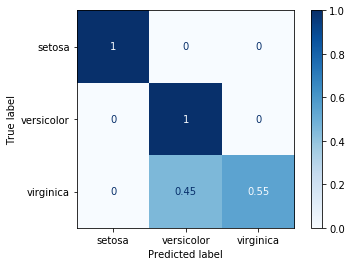


- RODADA 2 - Semente 375 -

- Acurácia 0.8444444444444444 -
- Sensibilidade [1.         0.78571429 0.75      ] -

              precision    recall  f1-score   support

      setosa       0.88      1.00      0.94        15
  versicolor       0.73      0.79      0.76        14
   virginica       0.92      0.75      0.83        16

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.84        45
weighted avg       0.85      0.84      0.84        45

Matriz de confusão normalizada


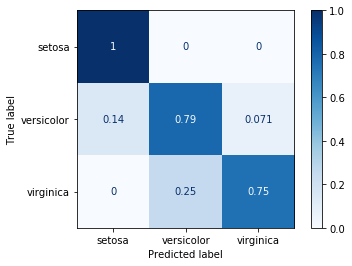


- RODADA 3 - Semente 6617 -

- Acurácia 0.8888888888888888 -
- Sensibilidade [1.         0.8        0.78571429] -

              precision    recall  f1-score   support

      setosa       0.95      1.00      0.98        21
  versicolor       0.73      0.80      0.76        10
   virginica       0.92      0.79      0.85        14

    accuracy                           0.89        45
   macro avg       0.87      0.86      0.86        45
weighted avg       0.89      0.89      0.89        45

Matriz de confusão normalizada


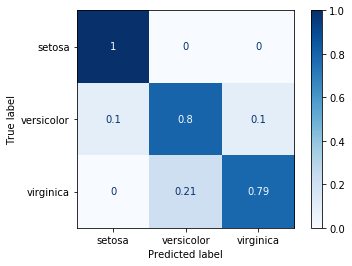


- RODADA 4 - Semente 5612 -

- Acurácia 0.8666666666666667 -
- Sensibilidade [1.         0.85714286 0.75      ] -

              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        15
  versicolor       0.75      0.86      0.80        14
   virginica       0.92      0.75      0.83        16

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

Matriz de confusão normalizada


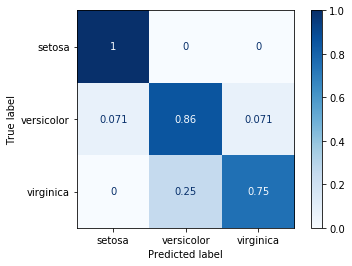


- RODADA 5 - Semente 2809 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         0.88235294 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.88      0.94        17
   virginica       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


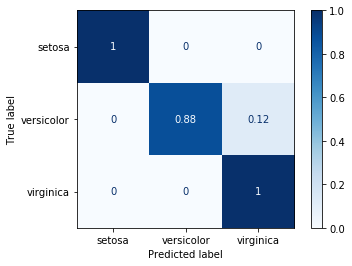


- RODADA 6 - Semente 6182 -

- Acurácia 0.8444444444444444 -
- Sensibilidade [1.         0.88235294 0.61538462] -

              precision    recall  f1-score   support

      setosa       0.88      1.00      0.94        15
  versicolor       0.75      0.88      0.81        17
   virginica       1.00      0.62      0.76        13

    accuracy                           0.84        45
   macro avg       0.88      0.83      0.84        45
weighted avg       0.87      0.84      0.84        45

Matriz de confusão normalizada


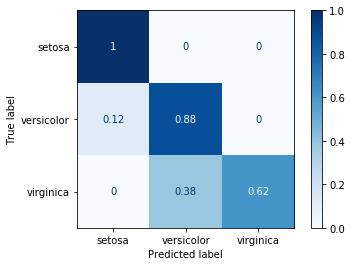


- RODADA 7 - Semente 2981 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.         1.         0.89473684] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


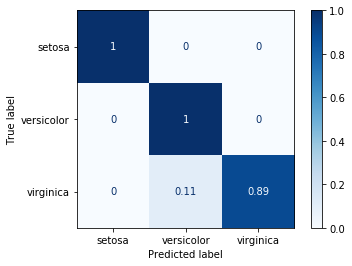


- RODADA 8 - Semente 3279 -

- Acurácia 0.8444444444444444 -
- Sensibilidade [1.         0.76470588 0.8       ] -

              precision    recall  f1-score   support

      setosa       0.93      1.00      0.96        13
  versicolor       0.81      0.76      0.79        17
   virginica       0.80      0.80      0.80        15

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.85        45
weighted avg       0.84      0.84      0.84        45

Matriz de confusão normalizada


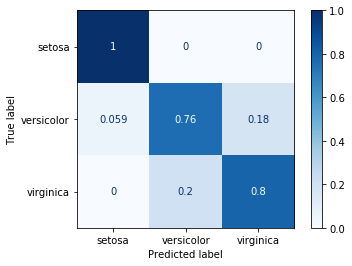


- RODADA 9 - Semente 897 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.84615385 0.9375    ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      0.85      0.88        13
   virginica       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Matriz de confusão normalizada


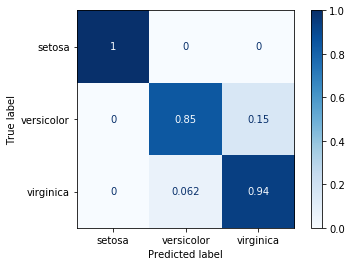


- RODADA 10 - Semente 3992 -

- Acurácia 0.7555555555555555 -
- Sensibilidade [0.70588235 0.66666667 1.        ] -

              precision    recall  f1-score   support

      setosa       0.80      0.71      0.75        17
  versicolor       0.71      0.67      0.69        18
   virginica       0.77      1.00      0.87        10

    accuracy                           0.76        45
   macro avg       0.76      0.79      0.77        45
weighted avg       0.76      0.76      0.75        45

Matriz de confusão normalizada


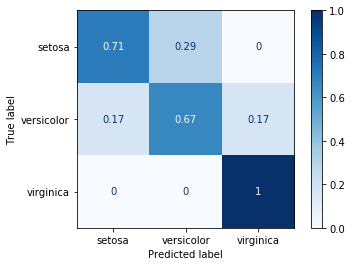


- RODADA 11 - Semente 1919 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.         0.93333333 1.        ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


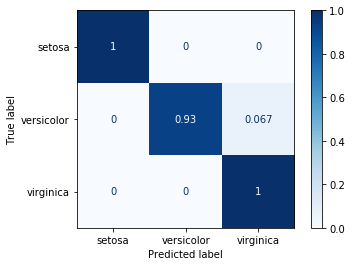


- RODADA 12 - Semente 3655 -

- Acurácia 0.8666666666666667 -
- Sensibilidade [1.         0.61538462 0.90909091] -

              precision    recall  f1-score   support

      setosa       0.81      1.00      0.89        21
  versicolor       0.89      0.62      0.73        13
   virginica       1.00      0.91      0.95        11

    accuracy                           0.87        45
   macro avg       0.90      0.84      0.86        45
weighted avg       0.88      0.87      0.86        45

Matriz de confusão normalizada


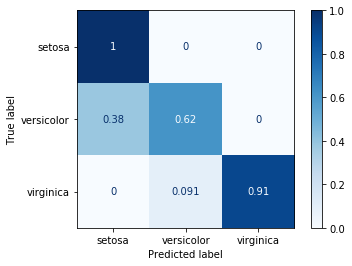


- RODADA 13 - Semente 4604 -

- Acurácia 0.8888888888888888 -
- Sensibilidade [1.         0.86666667 0.76923077] -

              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        17
  versicolor       0.81      0.87      0.84        15
   virginica       0.91      0.77      0.83        13

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45

Matriz de confusão normalizada


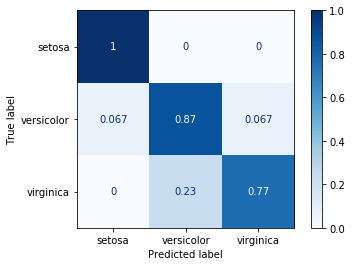


- RODADA 14 - Semente 4305 -

- Acurácia 0.8222222222222222 -
- Sensibilidade [1.         1.         0.42857143] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.65      1.00      0.79        15
   virginica       1.00      0.43      0.60        14

    accuracy                           0.82        45
   macro avg       0.88      0.81      0.80        45
weighted avg       0.88      0.82      0.81        45

Matriz de confusão normalizada


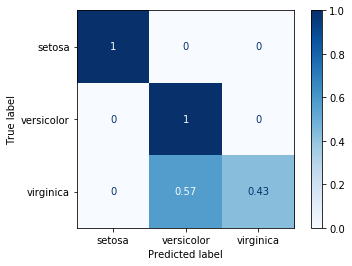


- RODADA 15 - Semente 1298 -

- Acurácia 0.7555555555555555 -
- Sensibilidade [0.94444444 0.81818182 0.5       ] -

              precision    recall  f1-score   support

      setosa       0.94      0.94      0.94        18
  versicolor       0.50      0.82      0.62        11
   virginica       0.89      0.50      0.64        16

    accuracy                           0.76        45
   macro avg       0.78      0.75      0.74        45
weighted avg       0.82      0.76      0.76        45

Matriz de confusão normalizada


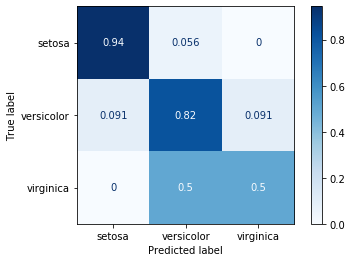


- RODADA 16 - Semente 6224 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.84615385 0.92857143] -

              precision    recall  f1-score   support

      setosa       0.95      1.00      0.97        18
  versicolor       0.92      0.85      0.88        13
   virginica       0.93      0.93      0.93        14

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45

Matriz de confusão normalizada


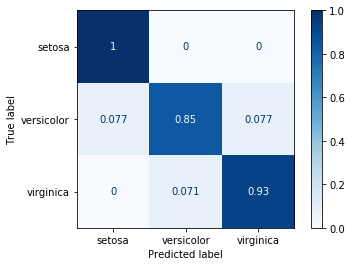


- RODADA 17 - Semente 975 -

- Acurácia 0.8444444444444444 -
- Sensibilidade [1.  1.  0.5] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.70      1.00      0.82        16
   virginica       1.00      0.50      0.67        14

    accuracy                           0.84        45
   macro avg       0.90      0.83      0.83        45
weighted avg       0.89      0.84      0.83        45

Matriz de confusão normalizada


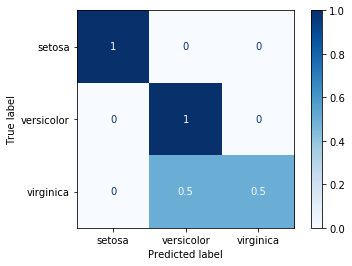


- RODADA 18 - Semente 3236 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.84615385 0.9       ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.92      0.85      0.88        13
   virginica       0.82      0.90      0.86        10

    accuracy                           0.93        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.94      0.93      0.93        45

Matriz de confusão normalizada


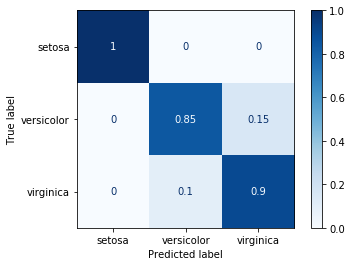


- RODADA 19 - Semente 7314 -

- Acurácia 0.9111111111111111 -
- Sensibilidade [0.94117647 0.84615385 0.93333333] -

              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        17
  versicolor       0.85      0.85      0.85        13
   virginica       0.88      0.93      0.90        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

Matriz de confusão normalizada


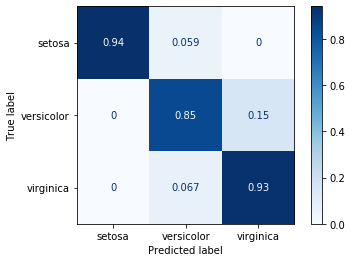


- RODADA 20 - Semente 3849 -

- Acurácia 0.7777777777777778 -
- Sensibilidade [0.93333333 0.66666667 0.73333333] -

              precision    recall  f1-score   support

      setosa       0.82      0.93      0.87        15
  versicolor       0.67      0.67      0.67        15
   virginica       0.85      0.73      0.79        15

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45

Matriz de confusão normalizada


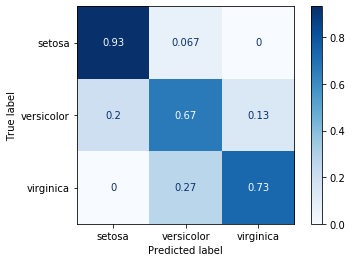


- RODADA 21 - Semente 2628 -

- Acurácia 0.9555555555555556 -
- Sensibilidade [1.    0.875 1.   ] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.88      0.93        16
   virginica       0.83      1.00      0.91        10

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

Matriz de confusão normalizada


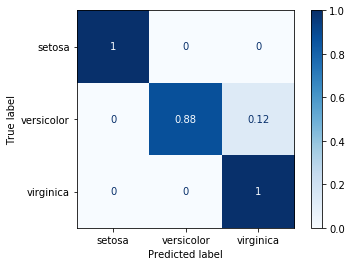


- RODADA 22 - Semente 4069 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.78571429 1.        ] -

              precision    recall  f1-score   support

      setosa       0.95      1.00      0.97        18
  versicolor       1.00      0.79      0.88        14
   virginica       0.87      1.00      0.93        13

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

Matriz de confusão normalizada


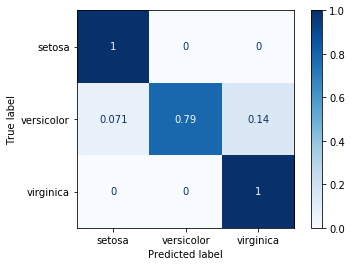


- RODADA 23 - Semente 3388 -

- Acurácia 0.8222222222222222 -
- Sensibilidade [0.66666667 0.875      0.88235294] -

              precision    recall  f1-score   support

      setosa       1.00      0.67      0.80        12
  versicolor       0.70      0.88      0.78        16
   virginica       0.88      0.88      0.88        17

    accuracy                           0.82        45
   macro avg       0.86      0.81      0.82        45
weighted avg       0.85      0.82      0.82        45

Matriz de confusão normalizada


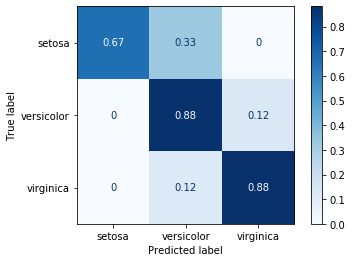


- RODADA 24 - Semente 4873 -

- Acurácia 0.6888888888888889 -
- Sensibilidade [1.         0.91666667 0.1875    ] -

              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        17
  versicolor       0.46      0.92      0.61        12
   virginica       1.00      0.19      0.32        16

    accuracy                           0.69        45
   macro avg       0.80      0.70      0.63        45
weighted avg       0.83      0.69      0.64        45

Matriz de confusão normalizada


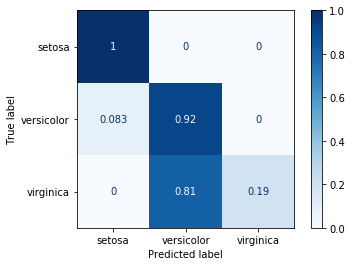


- RODADA 25 - Semente 1226 -

- Acurácia 0.8666666666666667 -
- Sensibilidade [0.92857143 0.92307692 0.77777778] -

              precision    recall  f1-score   support

      setosa       0.93      0.93      0.93        14
  versicolor       0.71      0.92      0.80        13
   virginica       1.00      0.78      0.88        18

    accuracy                           0.87        45
   macro avg       0.88      0.88      0.87        45
weighted avg       0.89      0.87      0.87        45

Matriz de confusão normalizada


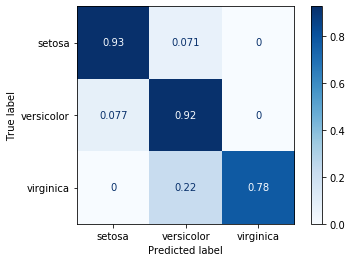


- RODADA 26 - Semente 643 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.   0.75 1.  ] -

              precision    recall  f1-score   support

      setosa       0.87      1.00      0.93        20
  versicolor       1.00      0.75      0.86        12
   virginica       1.00      1.00      1.00        13

    accuracy                           0.93        45
   macro avg       0.96      0.92      0.93        45
weighted avg       0.94      0.93      0.93        45

Matriz de confusão normalizada


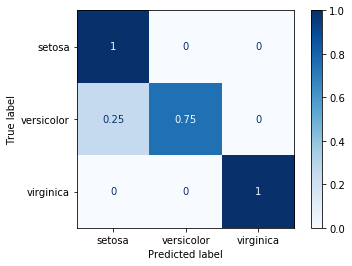


- RODADA 27 - Semente 964 -

- Acurácia 0.9333333333333333 -
- Sensibilidade [1.         0.89473684 0.91666667] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.89      0.92        19
   virginica       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45

Matriz de confusão normalizada


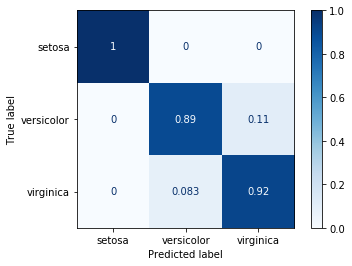


- RODADA 28 - Semente 7199 -

- Acurácia 0.7777777777777778 -
- Sensibilidade [0.58823529 0.81818182 0.94117647] -

              precision    recall  f1-score   support

      setosa       1.00      0.59      0.74        17
  versicolor       0.53      0.82      0.64        11
   virginica       0.89      0.94      0.91        17

    accuracy                           0.78        45
   macro avg       0.81      0.78      0.77        45
weighted avg       0.84      0.78      0.78        45

Matriz de confusão normalizada


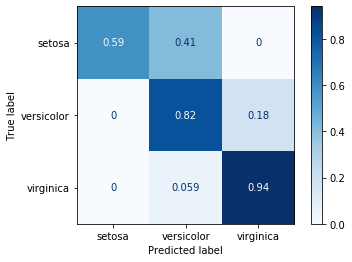


- RODADA 29 - Semente 3724 -

- Acurácia 0.9777777777777777 -
- Sensibilidade [1.   1.   0.95] -

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Matriz de confusão normalizada


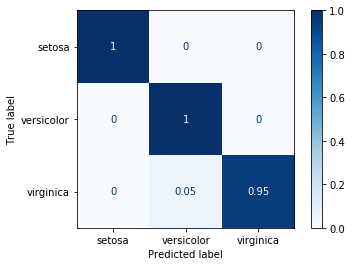

In [6]:
accuracy, recall, confusion = test_30_perceptron(features, targets, irisDS.target_names)

## Gerando _DataFrame_ de Sensibilidade e Acurácia

In [7]:
metricsDF = pd.DataFrame(data=recall, columns=irisDS.target_names)
metricsDF['accuracy'] = accuracy
metricsDF

,setosa,versicolor,virginica,accuracy
0,1.000000,0.823529,1.000000,0.933333
1,1.000000,1.000000,0.545455,0.888889
2,1.000000,0.785714,0.750000,0.844444
3,1.000000,0.800000,0.785714,0.888889
4,1.000000,0.857143,0.750000,0.866667
5,1.000000,0.882353,1.000000,0.955556
6,1.000000,0.882353,0.615385,0.844444
7,1.000000,1.000000,0.894737,0.955556
8,1.000000,0.764706,0.800000,0.844444
9,1.000000,0.846154,0.937500,0.933333


In [8]:
metricsDF.describe()

,setosa,versicolor,virginica,accuracy
count,30.000000,30.000000,30.000000,30.000000
mean,0.956944,0.852856,0.811213,0.877037
std,0.106292,0.099611,0.205630,0.073757
min,0.588235,0.615385,0.187500,0.688889
25%,1.000000,0.804545,0.750000,0.844444
50%,1.000000,0.851648,0.897368,0.888889
75%,1.000000,0.911184,0.947794,0.933333
max,1.000000,1.000000,1.000000,0.977778


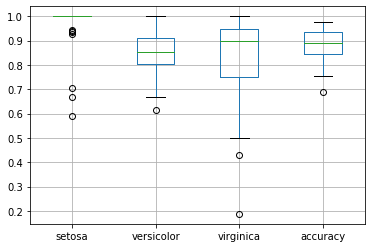

In [9]:
metricsDF.boxplot()